# Aufgabenblatt 5

## Zufallsvariablen und ihre Verteilungen

### Aufgabe 1

Ein Nachtwächter hat einen Schlüsselbund mit 10 ähnlich aussehenden Schlüsseln. Wenn er eine bestimmte Tür aufschließen will, in deren Schloss genau einer der 10 Schlüsseln passt, so probiert er entweder die Schlüssel nacheinander durch – d.h. kein Schlüssel wird zweimal probiert – bis er den passenden Schlüssel findet (Methode A); oder er probiert einen zufällig ausgewählten Schlüssel, und wenn er nicht passt, so schüttelt er den Schlüsselbund und probiert wieder einen zufällig ausgewählten Schlüssel (Methode B).

a) Die Zufallsvariable $X_A$ bzw. $X_B$ sei die Anzahl der Versuche, die nach Methode A bzw. B nötig sind, um den passenden Schlüssel zu finden. Man gebe die Verteilungen dieser beiden Zufallsgrößen an.  
b) Der Nachtwächter benutzt Methode A, wenn er nüchtern ist, und Methode B, wenn er betrunken ist. Die Wahrscheinlichkeit dafür, dass er in einer bestimmten Nacht betrunken ist, betrage 1/3. Wie groß ist die (bedingte) Wahrscheinlichkeit dafür, dass der Betriebsleiter den Nachtwächter der Trunkenheit im Dienst zu recht bezichtigt, nachdem er gesehen hat, dass dieser schon 8-mal erfolglos versucht hat, die Tür zu öffnen?

## a) Verteilungen der Zufallsgrößen $X_A$ und $X_B$

Die Zufallsvariable $X_A$ beschreibt die Anzahl der Versuche nach Methode A. Sie folgt einer diskreten Gleichverteilung über 1 bis 10:

$$ P(X_A = k) = \frac{1}{10}, \quad k = 1, 2, \ldots, 10 $$

Die Zufallsvariable $X_B$ beschreibt die Anzahl der Versuche nach Methode B. Sie folgt einer geometrischen Verteilung mit $p = \frac{1}{10}$:

$$ P(X_B = k) = \left( \frac{9}{10} \right)^{k-1} \cdot \frac{1}{10}, \quad k = 1, 2, \ldots $$

## b) Bedingte Wahrscheinlichkeit

- Wahrscheinlichkeit betrunken: $\frac{1}{3}$
- Wahrscheinlichkeit nüchtern: $\frac{2}{3}$
- $P(X_A > 7) = 0$ (nüchtern)
- $P(X_B > 7) = \left( \frac{9}{10} \right)^8 = 0.43046721$ (betrunken)

Gesucht: $P(B|A) = \frac{P(A|B) \cdot P(B)}{P(A)}$

- $P(A|B) = 0.43046721$
- $P(A|B^c) = 0$
- $P(A) = 0.43046721 \cdot \frac{1}{3} + 0 \cdot \frac{2}{3} = 0.14348907$
- $P(B|A) = \frac{0.43046721 \cdot \frac{1}{3}}{0.14348907} = 1$

Die bedingte Wahrscheinlichkeit, dass der Nachtwächter betrunken ist, beträgt 1.

In [1]:
import numpy as np
from scipy.stats import geom

# Methode A: Diskrete Gleichverteilung
def methode_A():
    return np.random.randint(1, 11)

# Methode B: Geometrische Verteilung
def methode_B():
    return geom.rvs(0.1)

# Wahrscheinlichkeit, dass der Nachtwächter betrunken ist
p_betrunken = 1/3

# Wahrscheinlichkeit, dass der Nachtwächter nüchtern ist
p_nuechtern = 2/3

# Anzahl der Versuche nach Methode A und B
versuche_A = [methode_A() for _ in range(10000)]
versuche_B = [methode_B() for _ in range(10000)]

# Bedingte Wahrscheinlichkeit, dass der Nachtwächter betrunken ist, nachdem er 8-mal erfolglos versucht hat, die Tür zu öffnen
p_XA_greater_7 = sum([1 for x in versuche_A if x > 7]) / len(versuche_A)
p_XB_greater_7 = sum([1 for x in versuche_B if x > 7]) / len(versuche_B)

p_A_given_B = p_XB_greater_7
p_A_given_not_B = 0
p_A = p_A_given_B * p_betrunken + p_A_given_not_B * p_nuechtern

p_B_given_A = (p_A_given_B * p_betrunken) / p_A

print(f"Bedingte Wahrscheinlichkeit, dass der Nachtwächter betrunken ist: {p_B_given_A}")

Bedingte Wahrscheinlichkeit, dass der Nachtwächter betrunken ist: 1.0


### Aufgabe 2

20\% aller Kälber erkranken in den ersten sechs Lebensmonaten an einer bestimmten nicht ansteckenden Krankheit. Um drei verschiedene Impfstoffe, A, B, und C auf ihre Wirksamkeit gegen die betreffende Krankheit zu testen, wurden 18 neugeborene Kälber eines Bauernhofes mit A, 11 neugeborene eines anderen Bauernhofes mit B und 26 neugeborene eines dritten Bauernhofes mit C geimpft. In den ersten sechs Lebensmonaten 

a) erkrankte genau eines der mit A geimpften Kälber,   
b) erkrankte keines der mit B geimpften Kälber,  
c) erkrankten genau zwei der mit C geimpften Kälber. 

Unter geeigneter Verteilungsannahme berechne man die Wahrscheinlichkeit dafür, dass bei völliger Wirkungslosigkeit des jeweiligen Impfstoffes keine größere als die unter a) bzw. b) bzw. c) angegebene Anzahl von Erkrankungen auftritt.


## 2a) Wahrscheinlichkeit, dass genau eines der mit A geimpften Kälber erkrankt:
$P_A = \binom{18}{1} \cdot 0.2^1 \cdot (1-0.2)^{18-1} = 18 \cdot 0.2 \cdot 0.8^{17} \approx 0.377$

## 2b) Wahrscheinlichkeit, dass keines der mit B geimpften Kälber erkrankt:
$P_B = \binom{11}{0} \cdot 0.2^0 \cdot (1-0.2)^{11-0} = 1 \cdot 1 \cdot 0.8^{11} \approx 0.107$

## 2c) Wahrscheinlichkeit, dass genau zwei der mit C geimpften Kälber erkranken:
$P_C = \binom{26}{2} \cdot 0.2^2 \cdot (1-0.2)^{26-2} = \frac{26 \cdot 25}{2 \cdot 1} \cdot 0.04 \cdot 0.8^{24} \approx 0.271$

In [2]:
import math

# Anzahl der Kälber
n_A = 18
n_B = 11
n_C = 26

# Wahrscheinlichkeit, dass ein Kalb erkrankt
p = 0.2

# 2a) Wahrscheinlichkeit, dass genau eines der mit A geimpften Kälber erkrankt
P_A = math.comb(n_A, 1) * (p ** 1) * ((1 - p) ** (n_A - 1))

# 2b) Wahrscheinlichkeit, dass keines der mit B geimpften Kälber erkrankt
P_B = math.comb(n_B, 0) * (p ** 0) * ((1 - p) ** (n_B - 0))

# 2c) Wahrscheinlichkeit, dass genau zwei der mit C geimpften Kälber erkranken
P_C = math.comb(n_C, 2) * (p ** 2) * ((1 - p) ** (n_C - 2))

print(f'2a) Wahrscheinlichkeit, dass genau eines der mit A geimpften Kälber erkrankt: {P_A:.3f}')
print(f'2b) Wahrscheinlichkeit, dass keines der mit B geimpften Kälber erkrankt: {P_B:.3f}')
print(f'2c) Wahrscheinlichkeit, dass genau zwei der mit C geimpften Kälber erkranken: {P_C:.3f}')

2a) Wahrscheinlichkeit, dass genau eines der mit A geimpften Kälber erkrankt: 0.081
2b) Wahrscheinlichkeit, dass keines der mit B geimpften Kälber erkrankt: 0.086
2c) Wahrscheinlichkeit, dass genau zwei der mit C geimpften Kälber erkranken: 0.061


### Aufgabe 3

Ein Hautarzt möchte sich eine Meinung darüber bilden, welches von zwei neu auf dem Markt angebotenen Hautpflegemitteln A und B wirksamer gegen Ekzeme ist. Dazu gibt er 15 unter Ekzemen leidenden Patienten jeweils ein Fläschchen von A und von B und bittet sie darum, darauf zu achten, welches der Hautpflegemittel die stärkere Wirkung zeigt. Er legt die folgende Entscheidungsregel fest: Wenn mehr als 11 Patienten der Ansicht sind, dass das Mittel A (bzw. B) wirksamer ist als das andere, so wird er davon ausgehen, dass dieses Mittel eine stärkere Wirkung hat. Andernfalls wird er A und B als gleich wirksam betrachten. Wie groß ist die Wahrscheinlichkeit dafür, dass der Arzt auf unterschiedliche Wirksamkeit schließt, falls A und B tatsächlich gleich wirksam sind?

## 3) Wahrscheinlichkeit, dass der Arzt auf unterschiedliche Wirksamkeit schließt, falls A und B tatsächlich gleich wirksam sind:

$P(X > 11) = P(X = 12) + P(X = 13) + P(X = 14) + P(X = 15)$

$P(X = k) = \binom{15}{k} \cdot 0.5^k \cdot (1-0.5)^{15-k}$

$P(X = 12) = \binom{15}{12} \cdot 0.5^{12} \cdot 0.5^{3} = \binom{15}{12} \cdot 0.5^{15}$

$P(X = 13) = \binom{15}{13} \cdot 0.5^{13} \cdot 0.5^{2} = \binom{15}{13} \cdot 0.5^{15}$

$P(X = 14) = \binom{15}{14} \cdot 0.5^{14} \cdot 0.5^{1} = \binom{15}{14} \cdot 0.5^{15}$

$P(X = 15) = \binom{15}{15} \cdot 0.5^{15} \cdot 0.5^{0} = \binom{15}{15} \cdot 0.5^{15}$

$P(X > 11) = \binom{15}{12} \cdot 0.5^{15} + \binom{15}{13} \cdot 0.5^{15} + \binom{15}{14} \cdot 0.5^{15} + \binom{15}{15} \cdot 0.5^{15}$

$P(X > 11) =  \frac{15!}{12!3!} \cdot 0.5^{15} + \frac{15!}{13!2!} \cdot 0.5^{15} + \frac{15!}{14!1!} \cdot 0.5^{15} + \frac{15!}{15!0!} \cdot 0.5^{15}$

$P(X > 11) =  \frac{15 \cdot 14 \cdot 13}{3 \cdot 2 \cdot 1} \cdot 0.5^{15} + \frac{15 \cdot 14}{2 \cdot 1} \cdot 0.5^{15} + 15 \cdot 0.5^{15} + 1 \cdot 0.5^{15}$

$P(X > 11) =  455 \cdot 0.5^{15} + 105 \cdot 0.5^{15} + 15 \cdot 0.5^{15} + 1 \cdot 0.5^{15}$

$P(X > 11) =  576 \cdot 0.5^{15}$

$P(X > 11) =  576 \cdot \frac{1}{32768}$

$P(X > 11) =  0.0176$

Die Wahrscheinlichkeit, dass der Arzt auf unterschiedliche Wirksamkeit schließt, falls A und B tatsächlich gleich wirksam sind, beträgt also ca. 0.0176.

In [3]:
# Anzahl der Patienten
n_patients = 15

# Wahrscheinlichkeit, dass ein Patient A oder B bevorzugt, wenn beide gleich wirksam sind
p_equal = 0.5

# Berechnung der Wahrscheinlichkeit, dass der Arzt auf unterschiedliche Wirksamkeit schließt, falls A und B tatsächlich gleich wirksam sind
P_diff = sum(math.comb(n_patients, k) * (p_equal ** k) * ((1 - p_equal) ** (n_patients - k)) for k in range(12, 16))

print(f'3) Wahrscheinlichkeit, dass der Arzt auf unterschiedliche Wirksamkeit schließt, falls A und B tatsächlich gleich wirksam sind: {P_diff:.4f}')

3) Wahrscheinlichkeit, dass der Arzt auf unterschiedliche Wirksamkeit schließt, falls A und B tatsächlich gleich wirksam sind: 0.0176


### Aufgabe 4

Bei der Einstellung einer Sekretärin wird eine Probezeit von 4 Wochen vereinbart. Während der Probezeit kann die Kündigung jeweils am Ende der Woche ausgesprochen werden. Im Rahmen der anfallenden Arbeiten hat die Sekretärin an jedem Arbeitstag (5 Tage pro Woche) 10 Briefe zu schreiben. Um zu entscheiden, ob die Sekretärin nach ihrer Probezeit endgültig eingestellt werden soll, legt sich der Büroleiter folgende Strategie zurecht: Enthält ein Brief nur einen Fehler, so korrigiert er diesen Fehler bei der Unterschrift. Enthält ein Brief jedoch mehr als einen Fehler, so muss der Brief von der Sekretärin noch einmal geschrieben werden. Müssen von den an einem Arbeitstag anfallenden 10 Briefen 3 oder mehr Briefe neu geschrieben werden, so wird die Sekretärin ermahnt. Wird sie an 3 aufeinander folgenden Tagen ein und derselben Woche ermahnt, so wird ihr am Ende der Woche die Kündigung ausgesprochen.

Unter der Annahme, dass die Anzahlen der Fehler pro Brief durch unabhängige, identisch mit Parameter $\lambda=1.0$ Poisson-verteilte Zufallsvariablen beschrieben werden können, berechne man die Wahrscheinlichkeit dafür, dass der Sekretärin spätestens am Ende der 4. Woche gekündigt wird.

(Hinweis: Man berechne nacheinander die Wahrscheinlichkeiten dafür, dass

1. ein Brief mehr als einen Fehler enthält,
2. die Sekretärin an einem bestimmten Tag ermahnt wird,
3. am Ende einer bestimmten Woche gekündigt wird und
4. im Verlauf der Probezeit gekündigt wird.)



$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$

### 1. Wahrscheinlichkeit, dass ein Brief mehr als einen Fehler enthält:
$P_{>1} = 1 - P(X \leq 1) = 1 - (P(X = 0) + P(X = 1))$

Da $X$ Poisson-verteilt ist mit $\lambda = 1.0$:
$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$

$P(X = 0) = \frac{1^0 e^{-1}}{0!} = e^{-1} \approx 0.3679$

$P(X = 1) = \frac{1^1 e^{-1}}{1!} = e^{-1} \approx 0.3679$

$P_{>1} = 1 - (0.3679 + 0.3679) = 1 - 0.7358 = 0.2642$

### 2. Wahrscheinlichkeit, dass die Sekretärin an einem bestimmten Tag ermahnt wird:
$P_{ermahnt} = P(\text{mindestens 3 von 10 Briefen haben mehr als einen Fehler})$

$P_{ermahnt} = \sum_{k=3}^{10} \binom{10}{k} P_{>1}^k (1 - P_{>1})^{10-k}$

$P_{ermahnt} \approx \sum_{k=3}^{10} \binom{10}{k} (0.2642)^k (1 - 0.2642)^{10-k}$

$P_{ermahnt} \approx 0.5167$

### 3. Wahrscheinlichkeit, dass die Sekretärin am Ende einer bestimmten Woche gekündigt wird:
$P_{gekuendigt} = P(\text{an 3 aufeinander folgenden Tagen in einer Woche ermahnt})$

$P_{gekuendigt} = P_{ermahnt}^3$

$P_{gekuendigt} \approx (0.5167)^3 \approx 0.2713$

### 4. Wahrscheinlichkeit, dass die Sekretärin im Verlauf der Probezeit gekündigt wird:
$P_{Probezeit} = 1 - P(\text{nicht gekündigt in 4 Wochen})$

$P(\text{nicht gekündigt in 4 Wochen}) = (1 - P_{gekuendigt})^4$

$P(\text{nicht gekündigt in 4 Wochen}) \approx (1 - 0.2713)^4 \approx 0.5522$

$P_{Probezeit} \approx 1 - 0.5522 \approx 0.7180$


In [4]:
import numpy as np

# Parameter
lambda_poisson = 1.0
days_per_week = 5
weeks = 4
letters_per_day = 10

# 1. Wahrscheinlichkeit, dass ein Brief mehr als einen Fehler enthält
P_more_than_one_error = 1 - (np.exp(-lambda_poisson) + lambda_poisson * np.exp(-lambda_poisson))

# 2. Wahrscheinlichkeit, dass die Sekretärin an einem bestimmten Tag ermahnt wird
P_reprimand = sum(math.comb(letters_per_day, k) * (P_more_than_one_error ** k) * ((1 - P_more_than_one_error) ** (letters_per_day - k)) for k in range(3, letters_per_day + 1))

# 3. Wahrscheinlichkeit, dass der Sekretärin am Ende einer bestimmten Woche gekündigt wird
a = P_reprimand ** 3 * (1-P_reprimand) ** 2 * 3
b = P_reprimand ** 5
c = P_reprimand ** 4 * (1-P_reprimand) ** 1 * 4
P_fired_week = a + b + c

# 4. Wahrscheinlichkeit, dass der Sekretärin im Verlauf der Probezeit gekündigt wird
P_not_fired_in_4_weeks = (1 - P_fired_week) ** weeks
P_fired_in_4_weeks = 1 - P_not_fired_in_4_weeks

print(f'1. Wahrscheinlichkeit, dass ein Brief mehr als einen Fehler enthält: {P_more_than_one_error:.4f}')
print(f'2. Wahrscheinlichkeit, dass die Sekretärin an einem bestimmten Tag ermahnt wird: {P_reprimand:.4f}')
print(f'3. Wahrscheinlichkeit, dass der Sekretärin am Ende einer bestimmten Woche gekündigt wird: {P_fired_week:.4f}')
print(f'4. Wahrscheinlichkeit, dass der Sekretärin im Verlauf der Probezeit gekündigt wird: {P_fired_in_4_weeks:.4f}')

1. Wahrscheinlichkeit, dass ein Brief mehr als einen Fehler enthält: 0.2642
2. Wahrscheinlichkeit, dass die Sekretärin an einem bestimmten Tag ermahnt wird: 0.5167
3. Wahrscheinlichkeit, dass der Sekretärin am Ende einer bestimmten Woche gekündigt wird: 0.2713
4. Wahrscheinlichkeit, dass der Sekretärin im Verlauf der Probezeit gekündigt wird: 0.7180


In [5]:
import numpy as np
P_2_errors = 1**2 * np.exp(-1) / 2*1
print(P_2_errors)

0.18393972058572117


### Aufgabe 5

Der Milchfettgehalt bei Kühen einer bestimmten Züchtung sei durch eine $N(3.7,0.0081)$-verteilte Zufallsvariable angemessen beschrieben. Um einen züchterischen Fortschritt zu erreichen, sollen die Tiere mit niedrigen Leistungen laufend ausgesondert werden und nur 60\% als Zuchtkühe verwendet werden. Man gebe die untere Grenze für den Fettgehalt an, den die Milch eines Tieres haben soll, das als Zuchttier verbleiben soll.

Plotten Sie die Lösung als Fläche unter der Dichtefunktion.

Der Milchfettgehalt bei Kühen einer bestimmten Züchtung sei durch eine $N(3.7,0.0081)$-verteilte Zufallsvariable angemessen beschrieben. Um einen züchterischen Fortschritt zu erreichen, sollen die Tiere mit niedrigen Leistungen laufend ausgesondert werden und nur 60\% als Zuchtkühe verwendet werden. Man gebe die untere Grenze für den Fettgehalt an, den die Milch eines Tieres haben soll, das als Zuchttier verbleiben soll.

### Lösung:

Sei $X \sim N(3.7, 0.0081)$ der Milchfettgehalt. Wir suchen den Wert $x$, sodass $P(X \geq x) = 0.6$.

1. Bestimme den z-Wert für die 60%-Quantil der Standardnormalverteilung $N(0,1)$:
    $$
    P(Z \leq z) = 0.4 \implies z \approx -0.2533
    $$

2. Transformiere den z-Wert zurück zur Normalverteilung $N(3.7, 0.0081)$:
    $$
    x = \mu + z \cdot \sigma = 3.7 + (-0.2533) \cdot \sqrt{0.0081} \approx 3.622
    $$

Die untere Grenze für den Fettgehalt, den die Milch eines Tieres haben soll, das als Zuchttier verbleiben soll, beträgt also ca. 3.622.

### Visualisierung:

Die Lösung kann als Fläche unter der Dichtefunktion der Normalverteilung dargestellt werden. Der Bereich links von $x = 3.622$ entspricht 40% der Fläche, während der Bereich rechts von $x = 3.622$ 60% der Fläche darstellt.

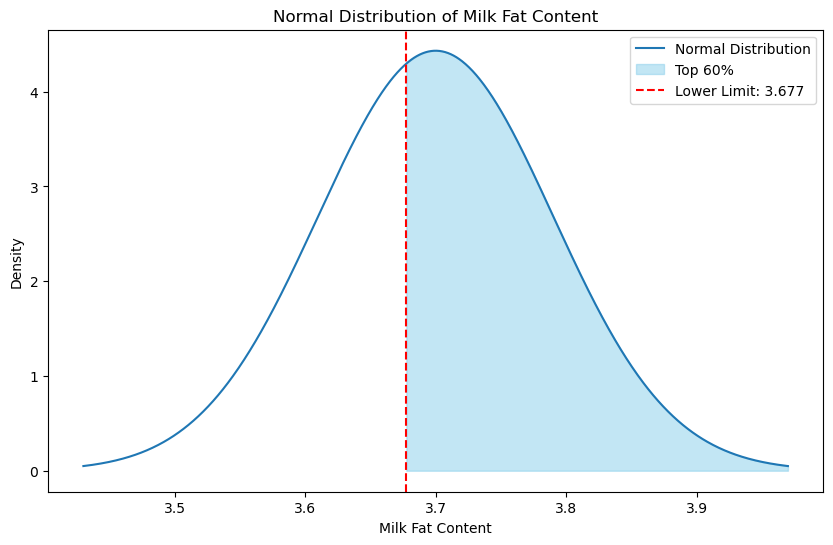

The lower limit for the milk fat content to be used as breeding cows is approximately: 3.677


In [6]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

# Parameters for the normal distribution
mu = 3.7
sigma = np.sqrt(0.0081)

# Calculate the lower limit for the top 60% of the distribution
lower_limit = norm.ppf(0.4, loc=mu, scale=sigma)

# Plot the normal distribution and the area under the curve
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = norm.pdf(x, loc=mu, scale=sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution')
plt.fill_between(x, y, where=(x >= lower_limit), color='skyblue', alpha=0.5, label='Top 60%')
plt.axvline(lower_limit, color='red', linestyle='--', label=f'Lower Limit: {lower_limit:.3f}')
plt.title('Normal Distribution of Milk Fat Content')
plt.xlabel('Milk Fat Content')
plt.ylabel('Density')
plt.legend()
plt.show()

print(f'The lower limit for the milk fat content to be used as breeding cows is approximately: {lower_limit:.3f}')

### Aufgabe 6

Die Lebensdauer elektrischer Bauteile einer bestimmten Sorte (in Stunden) lasse sich durch eine mit Parameter $\lambda$ exponentialverteilte Zufallsvariable $X$ angemessen beschreiben. Für die Aufgabenteile a) bis d) sei $\lambda=1/500$ vorausgesetzt.

a) Wie groß ist die Wahrscheinlichkeit dafür, dass ein Bauteil vor dem Zeitpunkt $t_0=200$ nicht ausfällt?  
b) Wie groß ist die Wahrscheinlichkeit dafür, dass ein Bauteil vor dem Zeitpunkt $t_1=100$ ausfällt?  
c) Wie groß ist die Wahrscheinlichkeit dafür, dass ein Bauteil zwischen den Zeitpunkten $t_2=200$ und $t_3=300$ ausfällt?  
d) Welchen Zeitpunkt $t_4$ überlebt ein Bauteil mit genau 90\% Sicherheit, welche Zeitpunkte überlebt ein Bauteil mit mindestens 90\% Sicherheit?  
e) Für welchen Wert des Parameters $\lambda$ ergibt sich eine Lebensdauerverteilung, bei der mit Wahrscheinlichkeit 0.9 die Lebensdauer eines Bauteils mindestens 50 Stunden beträgt?  


Die Lebensdauer elektrischer Bauteile einer bestimmten Sorte (in Stunden) lasse sich durch eine mit Parameter $\lambda$ exponentialverteilte Zufallsvariable $X$ angemessen beschreiben. Für die Aufgabenteile a) bis d) sei $\lambda=1/500$ vorausgesetzt.

### a) Wahrscheinlichkeit, dass ein Bauteil vor dem Zeitpunkt $t_0=200$ nicht ausfällt:

Die Verteilungsfunktion der Exponentialverteilung ist gegeben durch:
$$ F(t) = 1 - e^{-\lambda t} $$

Die Wahrscheinlichkeit, dass ein Bauteil vor dem Zeitpunkt $t_0=200$ nicht ausfällt, ist:
$$ P(X \geq 200) = 1 - F(200) = e^{-\lambda \cdot 200} = e^{-\frac{200}{500}} = e^{-0.4} \approx 0.6703 $$

### b) Wahrscheinlichkeit, dass ein Bauteil vor dem Zeitpunkt $t_1=100$ ausfällt:

$$ P(X \leq 100) = F(100) = 1 - e^{-\lambda \cdot 100} = 1 - e^{-\frac{100}{500}} = 1 - e^{-0.2} \approx 0.1813 $$

### c) Wahrscheinlichkeit, dass ein Bauteil zwischen den Zeitpunkten $t_2=200$ und $t_3=300$ ausfällt:

$$ P(200 \leq X \leq 300) = F(300) - F(200) = (1 - e^{-\lambda \cdot 300}) - (1 - e^{-\lambda \cdot 200}) $$
$$ = e^{-\frac{200}{500}} - e^{-\frac{300}{500}} = e^{-0.4} - e^{-0.6} \approx 0.6703 - 0.5488 = 0.1215 $$

### d) Zeitpunkt $t_4$, den ein Bauteil mit genau 90% Sicherheit überlebt:

Gesucht ist $t_4$, sodass $P(X \geq t_4) = 0.9$.

$$ P(X \geq t_4) = e^{-\lambda t_4} = 0.9 $$
$$ e^{-\frac{t_4}{500}} = 0.9 $$
$$ -\frac{t_4}{500} = \ln(0.9) $$
$$ t_4 = -500 \cdot \ln(0.9) \approx 52.68 $$

### e) Wert des Parameters $\lambda$, bei dem die Lebensdauer eines Bauteils mit Wahrscheinlichkeit 0.9 mindestens 50 Stunden beträgt:

Gesucht ist $\lambda$, sodass $P(X \geq 50) = 0.9$.

$$ P(X \geq 50) = e^{-\lambda \cdot 50} = 0.9 $$
$$ e^{-\lambda \cdot 50} = 0.9 $$
$$ -\lambda \cdot 50 = \ln(0.9) $$
$$ \lambda = -\frac{\ln(0.9)}{50} \approx 0.0021 $$

In [7]:
import numpy as np

# Parameter
lambda_exp = 1 / 500

# a) Wahrscheinlichkeit, dass ein Bauteil vor dem Zeitpunkt t0=200 nicht ausfällt
t0 = 200
P_not_fail_before_t0 = np.exp(-lambda_exp * t0)

# b) Wahrscheinlichkeit, dass ein Bauteil vor dem Zeitpunkt t1=100 ausfällt
t1 = 100
P_fail_before_t1 = 1 - np.exp(-lambda_exp * t1)

# c) Wahrscheinlichkeit, dass ein Bauteil zwischen den Zeitpunkten t2=200 und t3=300 ausfällt
t2 = 200
t3 = 300
P_fail_between_t2_t3 = np.exp(-lambda_exp * t2) - np.exp(-lambda_exp * t3)

# d) Zeitpunkt t4, den ein Bauteil mit genau 90% Sicherheit überlebt
P_survive_90_percent = 0.9
t4 = -np.log(P_survive_90_percent) / lambda_exp

# e) Wert des Parameters lambda, bei dem die Lebensdauer eines Bauteils mit Wahrscheinlichkeit 0.9 mindestens 50 Stunden beträgt
P_survive_50_hours = 0.9
t5 = 50
lambda_new = -np.log(P_survive_50_hours) / t5

print(f'a) Wahrscheinlichkeit, dass ein Bauteil vor dem Zeitpunkt t0=200 nicht ausfällt: {P_not_fail_before_t0:.4f}')
print(f'b) Wahrscheinlichkeit, dass ein Bauteil vor dem Zeitpunkt t1=100 ausfällt: {P_fail_before_t1:.4f}')
print(f'c) Wahrscheinlichkeit, dass ein Bauteil zwischen den Zeitpunkten t2=200 und t3=300 ausfällt: {P_fail_between_t2_t3:.4f}')
print(f'd) Zeitpunkt t4, den ein Bauteil mit genau 90% Sicherheit überlebt: {t4:.2f} Stunden')
print(f'e) Wert des Parameters lambda, bei dem die Lebensdauer eines Bauteils mit Wahrscheinlichkeit 0.9 mindestens 50 Stunden beträgt: {lambda_new:.4f}')

a) Wahrscheinlichkeit, dass ein Bauteil vor dem Zeitpunkt t0=200 nicht ausfällt: 0.6703
b) Wahrscheinlichkeit, dass ein Bauteil vor dem Zeitpunkt t1=100 ausfällt: 0.1813
c) Wahrscheinlichkeit, dass ein Bauteil zwischen den Zeitpunkten t2=200 und t3=300 ausfällt: 0.1215
d) Zeitpunkt t4, den ein Bauteil mit genau 90% Sicherheit überlebt: 52.68 Stunden
e) Wert des Parameters lambda, bei dem die Lebensdauer eines Bauteils mit Wahrscheinlichkeit 0.9 mindestens 50 Stunden beträgt: 0.0021


### Aufgabe 7

Die Brenndauer einer Glühbirne (in Stunden) lasse sich durch eine Zufallsvariable $T$ mit der Dichte

$$f(t)=\left\{\begin{array}{ll}
         \lambda^2te^{-\lambda t} & t >0 \\
         0 & \textrm{sonst}
       \end{array}\right.$$
       
mit $\lambda>0$ beschreiben.

a) Wie lautet die Verteilungsfunktion von $T$?  
b) Wie groß ist für $\lambda=1/400$ die Wahrscheinlichkeit dafür, dass die Brenndauer einer Birne mehr als 200 Betriebsstunden beträgt?  
c) Wie groß ist für $\lambda=1/400$ die Wahrscheinlichkeit dafür, dass die Brenndauer zwischen 200 und 400 Stunden liegt?

Die Brenndauer einer Glühbirne (in Stunden) lasse sich durch eine Zufallsvariable $T$ mit der Dichte

$$f(t)=\left\{\begin{array}{ll}
         \lambda^2te^{-\lambda t} & t >0 \\
         0 & \textrm{sonst}
       \end{array}\right.$$
       
mit $\lambda>0$ beschreiben.

### a) Verteilungsfunktion von $T$

Die Verteilungsfunktion $F(t)$ ist das Integral der Dichtefunktion $f(t)$:

$$ F(t) = \int_{0}^{t} \lambda^2 u e^{-\lambda u} \, du $$

Wir verwenden die partielle Integration:

$$ \int u \, dv = uv - \int v \, du $$

Setze $u = u$ und $dv = \lambda^2 e^{-\lambda u} \, du$:

$$ du = du \quad \text{und} \quad v = -\lambda e^{-\lambda u} $$

Dann ist:

$$ F(t) = \left[ -\lambda u e^{-\lambda u} \right]_{0}^{t} + \int_{0}^{t} \lambda e^{-\lambda u} \, du $$

$$ F(t) = -\lambda t e^{-\lambda t} + \left[ -e^{-\lambda u} \right]_{0}^{t} $$

$$ F(t) = -\lambda t e^{-\lambda t} + (1 - e^{-\lambda t}) $$

$$ F(t) = 1 - e^{-\lambda t} (1 + \lambda t) $$

### b) Wahrscheinlichkeit, dass die Brenndauer einer Birne mehr als 200 Betriebsstunden beträgt

Für $\lambda = \frac{1}{400}$:

$$ P(T > 200) = 1 - F(200) $$

$$ F(200) = 1 - e^{-\frac{200}{400}} (1 + \frac{200}{400}) $$

$$ F(200) = 1 - e^{-0.5} (1 + 0.5) $$

$$ F(200) = 1 - 1.5 e^{-0.5} $$

$$ P(T > 200) = 1.5 e^{-0.5} \approx 0.9098 $$

### c) Wahrscheinlichkeit, dass die Brenndauer zwischen 200 und 400 Stunden liegt

$$ P(200 \leq T \leq 400) = F(400) - F(200) $$

$$ F(400) = 1 - e^{-\frac{400}{400}} (1 + \frac{400}{400}) $$

$$ F(400) = 1 - e^{-1} (1 + 1) $$

$$ F(400) = 1 - 2 e^{-1} $$

$$ P(200 \leq T \leq 400) = (1 - 2 e^{-1}) - (1 - 1.5 e^{-0.5}) $$

$$ P(200 \leq T \leq 400) = 1.5 e^{-0.5} - 2 e^{-1} \approx 0.0902 $$

Die Wahrscheinlichkeit, dass die Brenndauer zwischen 200 und 400 Stunden liegt, beträgt also ca. 0.0902.

In [8]:
import numpy as np

# Parameter
lambda_exp = 1 / 400

# a) Verteilungsfunktion von T
def F_T(t, lambda_exp):
    if t < 0:
        return 0
    else:
        return 1 - np.exp(-lambda_exp * t) * (1 + lambda_exp * t)

# b) Wahrscheinlichkeit, dass die Brenndauer einer Birne mehr als 200 Betriebsstunden beträgt
t_200 = 200
P_more_than_200 = 1 - F_T(t_200, lambda_exp)

# c) Wahrscheinlichkeit, dass die Brenndauer zwischen 200 und 400 Stunden liegt
t_400 = 400
P_between_200_400 = F_T(t_400, lambda_exp) - F_T(t_200, lambda_exp)

print(f'a) Verteilungsfunktion von T: F_T(t) = 1 - exp(-lambda * t) * (1 + lambda * t)')
print(f'b) Wahrscheinlichkeit, dass die Brenndauer einer Birne mehr als 200 Betriebsstunden beträgt: {P_more_than_200:.4f}')
print(f'c) Wahrscheinlichkeit, dass die Brenndauer zwischen 200 und 400 Stunden liegt: {P_between_200_400:.4f}')

a) Verteilungsfunktion von T: F_T(t) = 1 - exp(-lambda * t) * (1 + lambda * t)
b) Wahrscheinlichkeit, dass die Brenndauer einer Birne mehr als 200 Betriebsstunden beträgt: 0.9098
c) Wahrscheinlichkeit, dass die Brenndauer zwischen 200 und 400 Stunden liegt: 0.1740


### Aufgabe 8
*(nur manuell)*

$X$ und $Y$ seien Zufallsvariablen mit den Dichten $f$ bzw. $g$

$$f(x)=\left\{\begin{array}{ll}
         \frac{1}{2} & 0 \leq x \leq 2 \\
         0 & \textrm{sonst} 
       \end{array}\right.,
g(y)=\left\{\begin{array}{ll}
         e^{-y} & y >0 \\
         0 & \textrm{sonst}
       \end{array}\right. $$

Man berechne die Verteilungsfunktionen der Zufallsvariablen $2X$, $Y^2$ und $4Y-1$ und gebe jeweils eine Dichte an.

$X$ und $Y$ seien Zufallsvariablen mit den Dichten $f$ bzw. $g$

$$f(x)=\left\{\begin{array}{ll}
         \frac{1}{2} & 0 \leq x \leq 2 \\
         0 & \textrm{sonst} 
       \end{array}\right.,
g(y)=\left\{\begin{array}{ll}
         e^{-y} & y >0 \\
         0 & \textrm{sonst}
       \end{array}\right. $$

### a) Verteilungsfunktion und Dichte von $2X$

Die Zufallsvariable $2X$ hat die Dichte $h(z)$, die durch Transformation der Dichte $f(x)$ von $X$ erhalten wird.

Für $Z = 2X$:

$$ h(z) = f\left(\frac{z}{2}\right) \cdot \left|\frac{d}{dz}\left(\frac{z}{2}\right)\right| $$

Da $f(x) = \frac{1}{2}$ für $0 \leq x \leq 2$:

$$ h(z) = \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}, \quad 0 \leq \frac{z}{2} \leq 2 $$

$$ h(z) = \frac{1}{4}, \quad 0 \leq z \leq 4 $$

Die Verteilungsfunktion $H(z)$ von $2X$ ist:

$$ H(z) = P(2X \leq z) = P\left(X \leq \frac{z}{2}\right) $$

$$ H(z) = \int_{0}^{z/2} \frac{1}{2} \, dx = \frac{z}{4}, \quad 0 \leq z \leq 4 $$

### b) Verteilungsfunktion und Dichte von $Y^2$

Die Zufallsvariable $Y^2$ hat die Dichte $k(w)$, die durch Transformation der Dichte $g(y)$ von $Y$ erhalten wird.

Für $W = Y^2$:

$$ k(w) = g(\sqrt{w}) \cdot \left|\frac{d}{dw}(\sqrt{w})\right| $$

Da $g(y) = e^{-y}$ für $y > 0$:

$$ k(w) = e^{-\sqrt{w}} \cdot \frac{1}{2\sqrt{w}}, \quad w > 0 $$

Die Verteilungsfunktion $K(w)$ von $Y^2$ ist:

$$ K(w) = P(Y^2 \leq w) = P(Y \leq \sqrt{w}) $$

$$ K(w) = \int_{0}^{\sqrt{w}} e^{-y} \, dy = 1 - e^{-\sqrt{w}}, \quad w > 0 $$

### c) Verteilungsfunktion und Dichte von $4Y - 1$

Die Zufallsvariable $4Y - 1$ hat die Dichte $m(v)$, die durch Transformation der Dichte $g(y)$ von $Y$ erhalten wird.

Für $V = 4Y - 1$:

$$ m(v) = g\left(\frac{v+1}{4}\right) \cdot \left|\frac{d}{dv}\left(\frac{v+1}{4}\right)\right| $$

Da $g(y) = e^{-y}$ für $y > 0$:

$$ m(v) = e^{-\frac{v+1}{4}} \cdot \frac{1}{4}, \quad v > -1 $$

Die Verteilungsfunktion $M(v)$ von $4Y - 1$ ist:

$$ M(v) = P(4Y - 1 \leq v) = P\left(Y \leq \frac{v+1}{4}\right) $$

$$ M(v) = \int_{0}^{(v+1)/4} e^{-y} \, dy = 1 - e^{-\frac{v+1}{4}}, \quad v > -1 $$

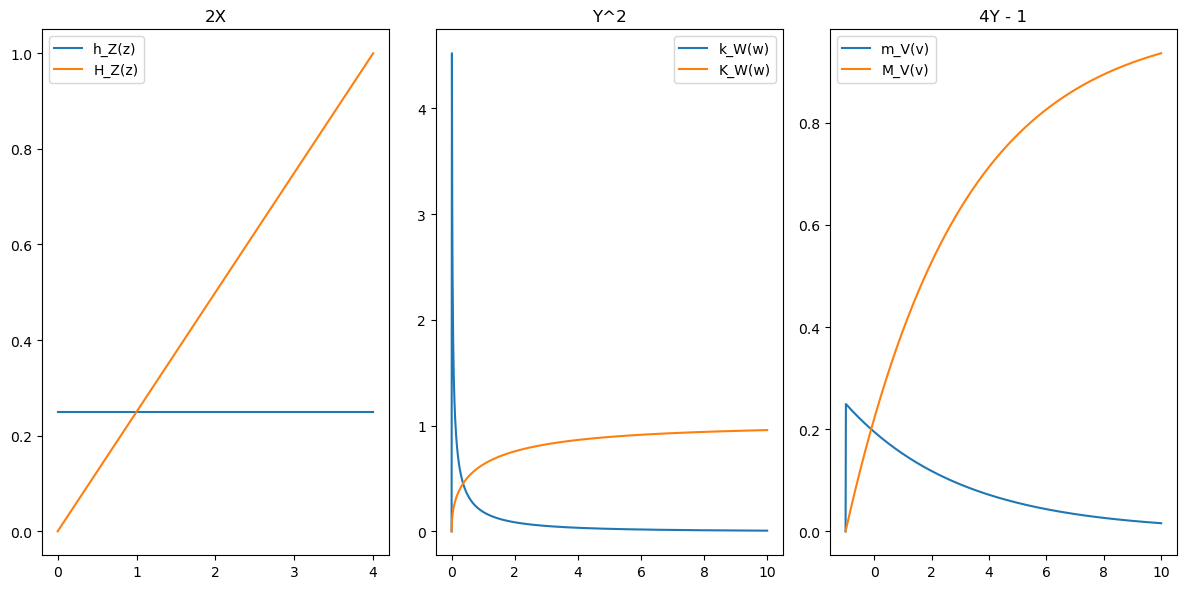

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# a) Verteilungsfunktion und Dichte von 2X
def f_X(x):
    return 0.5 if 0 <= x <= 2 else 0

def h_Z(z):
    return 0.25 if 0 <= z <= 4 else 0

def H_Z(z):
    return z / 4 if 0 <= z <= 4 else 1 if z > 4 else 0

# b) Verteilungsfunktion und Dichte von Y^2
def g_Y(y):
    return np.exp(-y) if y > 0 else 0

def k_W(w):
    return (np.exp(-np.sqrt(w)) / (2 * np.sqrt(w))) if w > 0 else 0

def K_W(w):
    return 1 - np.exp(-np.sqrt(w)) if w > 0 else 0

# c) Verteilungsfunktion und Dichte von 4Y - 1
def m_V(v):
    return (np.exp(-(v + 1) / 4) / 4) if v > -1 else 0

def M_V(v):
    return 1 - np.exp(-(v + 1) / 4) if v > -1 else 0

# Plotting the densities and distribution functions
x_vals = np.linspace(0, 4, 1000)
y_vals = np.linspace(0, 10, 1000)
v_vals = np.linspace(-1, 10, 1000)

# Plot for 2X
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(x_vals, [h_Z(z) for z in x_vals], label='h_Z(z)')
plt.plot(x_vals, [H_Z(z) for z in x_vals], label='H_Z(z)')
plt.title('2X')
plt.legend()

# Plot for Y^2
plt.subplot(1, 3, 2)
plt.plot(y_vals, [k_W(w) for w in y_vals], label='k_W(w)')
plt.plot(y_vals, [K_W(w) for w in y_vals], label='K_W(w)')
plt.title('Y^2')
plt.legend()

# Plot for 4Y - 1
plt.subplot(1, 3, 3)
plt.plot(v_vals, [m_V(v) for v in v_vals], label='m_V(v)')
plt.plot(v_vals, [M_V(v) for v in v_vals], label='M_V(v)')
plt.title('4Y - 1')
plt.legend()

plt.tight_layout()
plt.show()